In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [3]:
def load_image(img_path):
    image = Image.open(img_path)
    return image

In [4]:
image = load_image('High-Resolution.png')
image = image.convert('L')

In [38]:
image.show()

In [6]:
img_array = np.array(image)

In [7]:
img_array

array([[116, 107, 116, ..., 116,  94,  89],
       [116, 116, 116, ...,  98,  94,  94],
       [132, 132, 116, ..., 117, 117, 104],
       ...,
       [ 24,  24,  46, ...,  68,  68,  57],
       [ 24,  32,  32, ...,  68,  57,  57],
       [ 24,  32,  32, ...,  57,  57,  55]], dtype=uint8)

# Wyświetlanie histogramu wczytanego obrazu

In [8]:
gray_hist_data = img_array.flatten()

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 2412.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 3959.,    0.,    0.,    0.,
           0., 1914.,    0., 3377.,    0.,    0.,    0., 1051.,    0.,
           0., 6051.,  751.,    0.,    0.,    0., 1172., 1278.,    0.,
           0., 4018.,    0., 3234., 1852.,    0.,    0., 2575., 1400.,
           0.,    0., 2004., 4050.,    0., 1964., 6254.,    0.,    0.,
        2513.,    0., 2472., 2051.,    0., 2612., 4921., 1044., 1806.,
         786., 1391., 3434., 2409., 2179.,    0.,    0., 6542., 1955.,
         841.,    0., 1067.,  843., 4762., 1321.,  721., 4066., 3914.,
           0.,    0., 2750., 1672.,  965., 3228., 4105.,    0., 2725.,
        2453.,    0., 2089., 1100., 2012., 1089., 2570., 1419., 1154.,
        4425.,    0., 1921., 1581., 2325.,  713.,    0.,    0., 6404.,
      

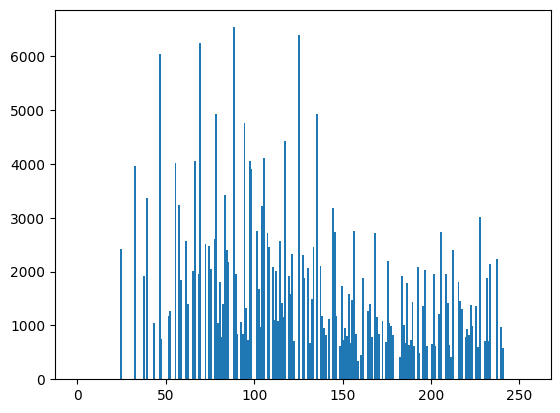

In [9]:
plt.hist(gray_hist_data, bins = 255, range=(0, 255))

# Rozciąganie histogramu

## LUT TABLE

In [10]:
lut_table = np.zeros(256)
max_value = max(gray_hist_data)
min_value = min(gray_hist_data)
for i in range(0, len(lut_table)):
    if i >= max_value:
        lut_table[i] = 255
        
    elif i <= min_value:
        lut_table[i] = 0
        
    else:
        lut_table[i] = int((i - min_value)/(max_value - min_value) * 255)

In [11]:
lut_table

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   1.,   2.,   3.,   4.,   5.,   7.,   8.,   9.,
        10.,  11.,  12.,  14.,  15.,  16.,  17.,  18.,  20.,  21.,  22.,
        23.,  24.,  25.,  27.,  28.,  29.,  30.,  31.,  33.,  34.,  35.,
        36.,  37.,  38.,  40.,  41.,  42.,  43.,  44.,  46.,  47.,  48.,
        49.,  50.,  51.,  53.,  54.,  55.,  56.,  57.,  59.,  60.,  61.,
        62.,  63.,  64.,  66.,  67.,  68.,  69.,  70.,  72.,  73.,  74.,
        75.,  76.,  77.,  79.,  80.,  81.,  82.,  83.,  85.,  86.,  87.,
        88.,  89.,  90.,  92.,  93.,  94.,  95.,  96.,  97.,  99., 100.,
       101., 102., 103., 105., 106., 107., 108., 109., 110., 112., 113.,
       114., 115., 116., 118., 119., 120., 121., 122., 123., 125., 126.,
       127., 128., 129., 131., 132., 133., 134., 135., 136., 138., 139.,
       140., 141., 142., 144., 145., 146., 147., 14

In [12]:
extend_hist_data = lut_table[img_array]

In [13]:
extend_hist_data

array([[108.,  97., 108., ..., 108.,  82.,  76.],
       [108., 108., 108., ...,  87.,  82.,  82.],
       [127., 127., 108., ..., 109., 109.,  94.],
       ...,
       [  0.,   0.,  25., ...,  51.,  51.,  38.],
       [  0.,   9.,   9., ...,  51.,  38.,  38.],
       [  0.,   9.,   9., ...,  38.,  38.,  36.]])

In [14]:
extend_hist_data_flatten = extend_hist_data.flatten()

(array([2412.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3959.,    0.,    0.,    0.,    0.,    0., 1914.,    0., 3377.,
           0.,    0.,    0.,    0., 1051.,    0.,    0., 6051.,    0.,
         751.,    0.,    0.,    0., 1172.,    0., 1278.,    0.,    0.,
        4018.,    0., 3234.,    0., 1852.,    0.,    0., 2575., 1400.,
           0.,    0.,    0., 2004., 4050.,    0., 1964.,    0., 6254.,
           0.,    0., 2513.,    0.,    0., 2472., 2051.,    0., 2612.,
        4921., 1044.,    0., 1806.,  786., 1391., 3434., 2409.,    0.,
        2179.,    0.,    0., 6542., 1955.,  841.,    0.,    0., 1067.,
         843., 4762., 1321.,    0.,  721., 4066., 3914.,    0.,    0.,
        2750.,    0., 1672.,  965., 3228., 4105.,    0., 2725.,    0.,
        2453.,    0., 2089., 1100., 2012.,    0., 1089., 2570., 1419.,
        1154., 4425.,    0.,    0., 1921., 1581., 2325.,  713.,    0.,
           0.,    0., 6404.,    0., 2319., 1885.,    0.,    0., 2064.,
      

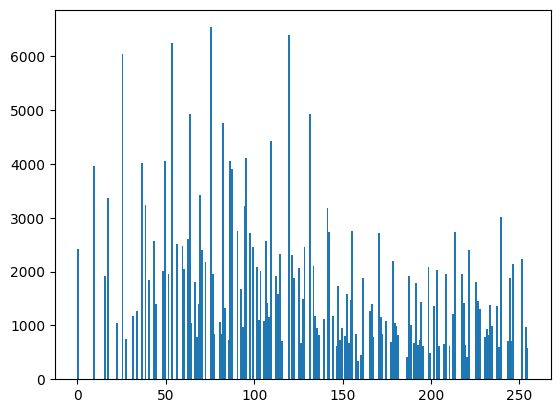

In [15]:
plt.hist(extend_hist_data_flatten, bins = 255, range = (0,255))

In [16]:
extend_image = Image.fromarray(extend_hist_data)

In [17]:
extend_image.show()

# Wyrównanie histogramu

## histogram rozkładu

In [18]:
hist_data, bin_edges = np.histogram(gray_hist_data, bins = 256, range=(0, 256))

In [19]:
distribution = np.cumsum(hist_data) / len(gray_hist_data)

In [20]:
distribution

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00920105,
       0.00920105, 0.00920105, 0.00920105, 0.00920105, 0.00920105,
       0.00920105, 0.00920105, 0.02430344, 0.02430344, 0.02430344,
       0.02430344, 0.02430344, 0.03160477, 0.03160477, 0.044487  ,
       0.044487  , 0.044487  , 0.044487  , 0.04849625, 0.04849625,
       0.04849625, 0.07157898, 0.07444382, 0.07444382, 0.07444382,
       0.07444382, 0.07891464, 0.08378983, 0.08378983, 0.08378983,
       0.09911728, 0.09911728, 0.11145401, 0.11851883, 0.11851883,
       0.11851883, 0.12834167, 0.13368225, 0.13368225, 0.13368225,
       0.1413269 , 0.15677643, 0.15677643, 0.16426849, 0.18812561,
       0.18812561, 0.18812561, 0.19771194, 0.19771194, 0.20714

In [21]:
d_zero = None
for i in range(len(distribution)):
    if distribution[i]!=0:
        d_zero = distribution[i]
        break
        

In [22]:
d_zero

np.float64(0.0092010498046875)

In [23]:
lut_table_equalization = np.zeros(256)

In [24]:
for i in range(255):
    if distribution[i] < d_zero:
        lut_table_equalization[i] = 0
    else:
        lut_table_equalization[i] = int((distribution[i] - d_zero)/ (1-d_zero) * (len(hist_data) - 1))

In [25]:
lut_table_equalization

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
         3.,   3.,   3.,   3.,   5.,   5.,   9.,   9.,   9.,   9.,  10.,
        10.,  10.,  16.,  16.,  16.,  16.,  16.,  17.,  19.,  19.,  19.,
        23.,  23.,  26.,  28.,  28.,  28.,  30.,  32.,  32.,  32.,  34.,
        37.,  37.,  39.,  46.,  46.,  46.,  48.,  48.,  50.,  52.,  52.,
        55.,  60.,  61.,  63.,  63.,  65.,  68.,  71.,  73.,  73.,  73.,
        79.,  81.,  82.,  82.,  83.,  84.,  88.,  90.,  90.,  94.,  98.,
        98.,  98., 101., 103., 104., 107., 111., 111., 113., 116., 116.,
       118., 119., 121., 122., 124., 126., 127., 131., 131., 133., 135.,
       137., 138., 138., 138., 144., 144., 146., 148., 148., 150., 151.,
       152., 155., 155., 160., 160., 162., 163., 164., 165., 165., 166.,
       166., 169., 171., 173., 173., 173., 175., 17

In [26]:
equal_hist_data = lut_table_equalization[img_array]

In [27]:
equal_hist_data

array([[127., 113., 127., ..., 127.,  88.,  81.],
       [127., 127., 127., ...,  98.,  88.,  88.],
       [152., 152., 127., ..., 131., 131., 107.],
       ...,
       [  0.,   0.,  16., ...,  39.,  39.,  26.],
       [  0.,   3.,   3., ...,  39.,  26.,  26.],
       [  0.,   3.,   3., ...,  26.,  26.,  23.]])

(array([2412.,    0.,    0., 3959.,    0., 1914.,    0.,    0.,    0.,
        3377., 1051.,    0.,    0.,    0.,    0.,    0., 6802., 1172.,
           0., 1278.,    0.,    0.,    0., 4018.,    0.,    0., 3234.,
           0., 1852.,    0., 2575.,    0., 1400.,    0., 2004.,    0.,
           0., 4050.,    0., 1964.,    0.,    0.,    0.,    0.,    0.,
           0., 6254.,    0., 2513.,    0., 2472.,    0., 2051.,    0.,
           0., 2612.,    0.,    0.,    0.,    0., 4921., 1044.,    0.,
        2592.,    0., 1391.,    0.,    0., 3434.,    0.,    0., 2409.,
           0., 2179.,    0.,    0.,    0.,    0.,    0., 6542.,    0.,
        1955.,  841., 1067.,  843.,    0.,    0.,    0., 4762.,    0.,
        2042.,    0.,    0.,    0., 4066.,    0.,    0.,    0., 3914.,
           0.,    0., 2750.,    0., 1672.,  965.,    0.,    0., 3228.,
           0.,    0.,    0., 4105.,    0., 2725.,    0.,    0., 2453.,
           0., 2089., 1100.,    0., 2012., 1089.,    0., 2570.,    0.,
      

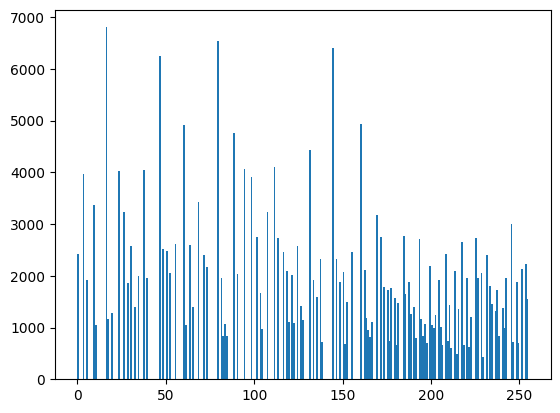

In [28]:
plt.hist(equal_hist_data.flatten(), bins = 255, range= (0,255))

In [29]:
equal_image = Image.fromarray(equal_hist_data)
equal_image.show()

# Binaryzacja Otsu

In [30]:
t, otsu_array = cv2.threshold(img_array, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [31]:
t

138.0

(array([168796.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

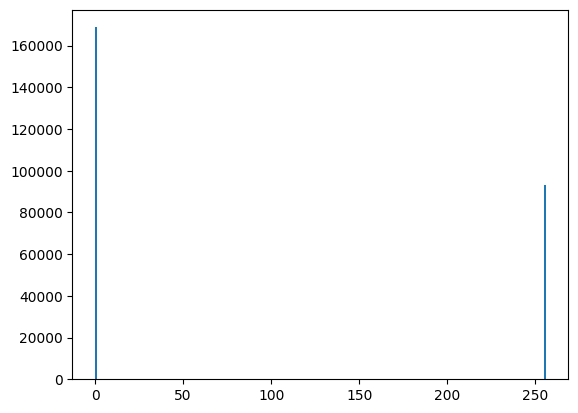

In [32]:
plt.hist(otsu_array.flatten(), bins = 256, range=(0,256))

In [33]:
otsu_image = Image.fromarray(otsu_array)
otsu_image.show()

# Zmiana jasności

In [34]:
def change_brightness(brightness_array, scale):
    brightness_array = brightness_array*scale
    return brightness_array

In [35]:
brightness_array = change_brightness(img_array, 0.6)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 2412.,    0.,    0.,    0.,
           0., 3959.,    0.,    0., 1914., 3377.,    0., 1051.,    0.,
        6051.,  751.,    0., 1172., 1278.,    0., 4018., 5086.,    0.,
        2575., 1400.,    0., 6054., 1964., 6254.,    0., 2513., 2472.,
        2051., 7533., 1044., 2592., 4825., 2409., 2179., 6542., 1955.,
         841., 1910., 4762., 2042., 7980.,    0., 2750., 2637., 3228.,
        4105., 5178.,    0., 3189., 3101., 2570., 2573., 4425., 1921.,
        3906.,  713.,    0., 6404., 4204.,    0., 2741., 3963.,    0.,
        4933., 3289.,  950.,  820., 1111., 3178., 3911.,  622., 1728.,
        1693., 2385.,  668., 4242., 1192.,    0., 2345.,    0., 1271.,
        2186., 2718., 1161.,  833., 1074.,  695., 3235., 1800.,    0.,
           0., 2346., 1004., 2456., 1373., 1438.,  612., 2574.,    0.,
        3393.,  620.,    0., 2610.,  617., 1211., 2733., 1963., 1417.,
      

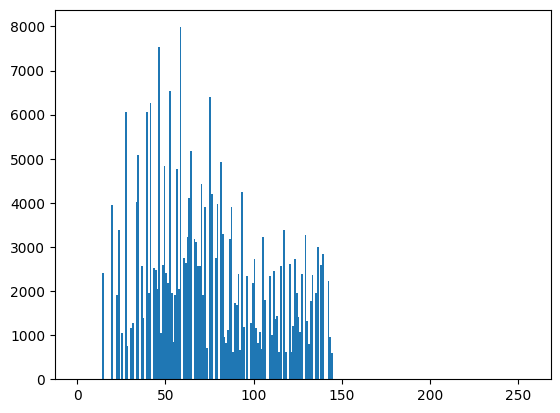

In [36]:
plt.hist(brightness_array.flatten(), bins=256, range=(0,256))

In [37]:
new_image = Image.fromarray(brightness_array)
new_image.show()